In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")

In [3]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
train.dtypes

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object

In [5]:
#Description
train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [6]:
#Description
test.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,729.000000,730.000000
mean,2554.500000,183.000000,1013.503014,26.372466,23.963288,22.110274,20.460137,82.669863,76.360274,3.664384,103.923182,22.484247
std,210.877136,105.438271,5.505871,5.672521,5.278098,5.170744,5.391169,7.818714,17.934121,3.639272,81.695458,9.954779
min,2190.000000,1.000000,1000.000000,7.400000,5.900000,4.200000,-0.000000,39.000000,0.000000,0.000000,10.000000,4.500000
25%,2372.250000,92.000000,1008.725000,21.600000,19.825000,17.825000,16.800000,77.250000,69.000000,0.325000,40.000000,14.500000
50%,2554.500000,183.000000,1012.700000,27.800000,25.650000,23.900000,22.300000,82.000000,83.000000,2.200000,70.000000,21.300000
75%,2736.750000,274.000000,1017.600000,31.000000,28.375000,26.400000,25.000000,89.000000,88.000000,6.675000,200.000000,28.400000
max,2919.000000,365.000000,1032.200000,35.800000,31.800000,29.100000,26.700000,98.000000,100.000000,11.800000,300.000000,59.500000


In [7]:
print(train.isnull().sum())

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [8]:
print(test.isnull().sum())

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64


In [9]:
test["winddirection"] = test["winddirection"].fillna(0)

In [10]:
print(test.isnull().sum())

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [11]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train = train.drop(["id", "day", "winddirection"], axis=1)
test = test.drop(["day", "winddirection"], axis=1)

In [12]:
train.head()
train

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,24.8,0
...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,22.1,1
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,35.3,1
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,32.9,1
2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,18.0,1


In [13]:
test.head()
test

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,windspeed
0,2190,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,24.3
1,2191,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,35.3
2,2192,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,16.9
3,2193,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,50.6
4,2194,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,19.4
...,...,...,...,...,...,...,...,...,...,...
725,2915,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,34.3
726,2916,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,25.2
727,2917,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,21.9
728,2918,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,39.5


Visualization, Modeling

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

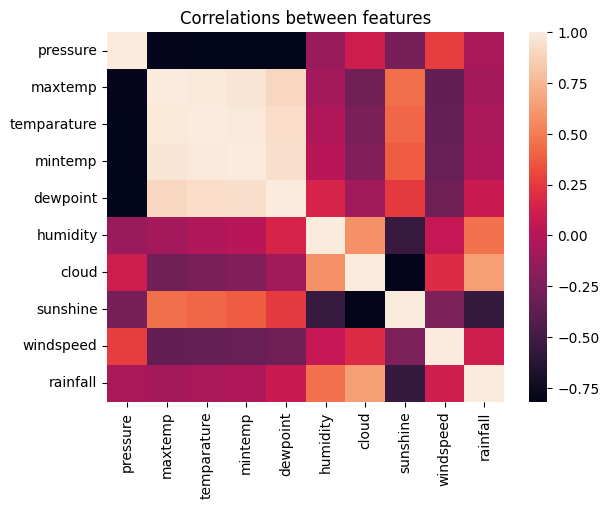

In [15]:
correlations = train.corr()
ax = plt.axes()
sns.heatmap(correlations,ax = ax)
ax.set_title("Correlations between features")
plt.show()

**MODEL**

In [16]:
import sklearn

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [17]:
X = train.drop(['rainfall'], axis=1)
y = train['rainfall']

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = rf.predict(X_val)

In [20]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.47%


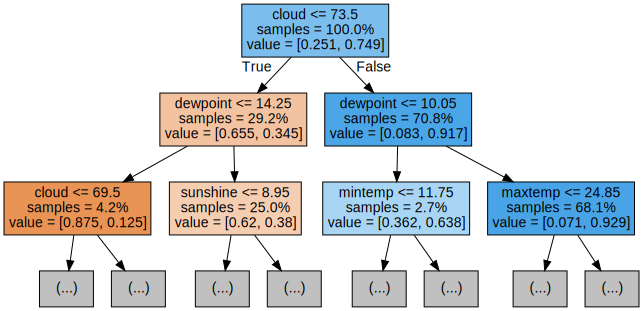

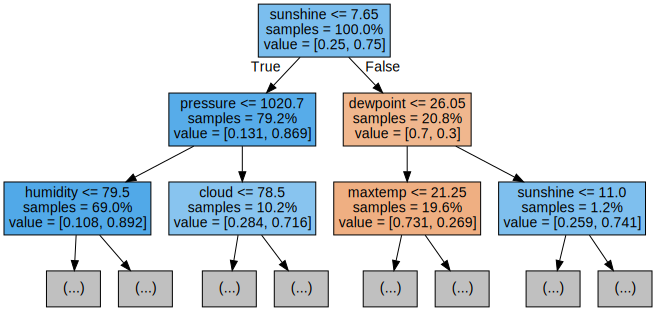

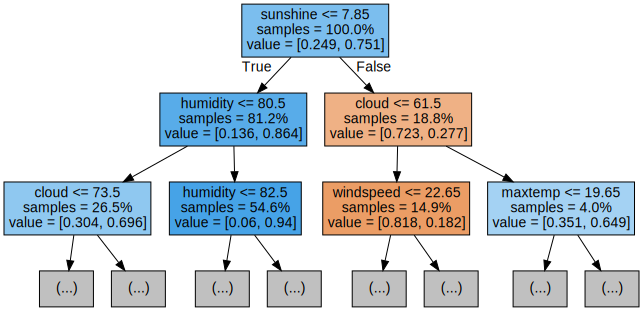

In [21]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

**Hyperparameter tuning**

In [22]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f227f222bc0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f22a013ad70>})

In [23]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 348}


In [24]:
y_pred = best_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.30%


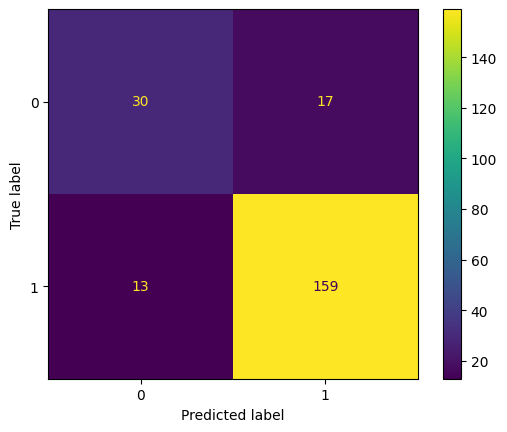

In [25]:
cm = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [26]:
features = ['pressure', 'maxtemp', 'temparature', 'mintemp', "dewpoint", "humidity", 'cloud','sunshine','windspeed']
X = train[features]
y = train['rainfall']
X_test = test[features]

predicted = best_rf.predict(X_test)

output = pd.DataFrame({'id': test.id, 'rainfall': predicted})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
test.head()

Your submission was successfully saved!


,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,windspeed
0,2190,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,24.3
1,2191,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,35.3
2,2192,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,16.9
3,2193,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,50.6
4,2194,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,19.4
